<a href="https://colab.research.google.com/github/mahmutgemici/Midterm1/blob/main/Quiz_Q4_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import numpy as np
from pickle import dump
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [2]:
# Load and clean a text file
def fClean_Load(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    # Clean text
    words = re.findall(r'[a-z\.]+', text.lower())
    return ' '.join(words)

In [3]:
# load text
raw_text = fClean_Load('Unhappy.txt')


In [4]:
# organize into sequences of characters
#################################################################################
############################# Select a Size of 5/10/20/30/40/50 ####################
##################################################################################
length = 10  #burayi degistir
lines = list()
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i+1]
    lines.append(seq)
print('Total lines: %d' % len(lines))

print(lines)

Total lines: 4944
['animals are happy so long as they have health and e', 'nimals are happy so long as they have health and en', 'imals are happy so long as they have health and eno', 'mals are happy so long as they have health and enou', 'als are happy so long as they have health and enoug', 'ls are happy so long as they have health and enough', 's are happy so long as they have health and enough ', ' are happy so long as they have health and enough t', 'are happy so long as they have health and enough to', 're happy so long as they have health and enough to ', 'e happy so long as they have health and enough to e', ' happy so long as they have health and enough to ea', 'happy so long as they have health and enough to eat', 'appy so long as they have health and enough to eat.', 'ppy so long as they have health and enough to eat. ', 'py so long as they have health and enough to eat. h', 'y so long as they have health and enough to eat. hu', ' so long as they have health and enough to ea

In [5]:
## Character mapping

chars = sorted(list(set(''.join(lines))))
mapping = dict((c, i) for i, c in enumerate(chars))

sequences = list()
for line in lines:
	encoded_seq = [mapping[char] for char in line]
	sequences.append(encoded_seq)
    
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 28


In [6]:
## Input for the Model
sequences = np.array(sequences)
X1, y = sequences[:,:-1], sequences[:,-1]
temp = [to_categorical(x, num_classes=vocab_size) for x in X1]
X = np.array(temp)
y = to_categorical(y, num_classes=vocab_size)

In [7]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                23808     
_________________________________________________________________
dense (Dense)                (None, 28)                1820      
Total params: 25,628
Trainable params: 25,628
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# Model Compiling and Fiting
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
155/155 [==============================] - 1s 4ms/step - loss: 2.9261 - accuracy: 0.1768
Epoch 2/100
155/155 [==============================] - 1s 4ms/step - loss: 2.8175 - accuracy: 0.1798
Epoch 3/100
155/155 [==============================] - 1s 4ms/step - loss: 2.7294 - accuracy: 0.2071
Epoch 4/100
155/155 [==============================] - 1s 4ms/step - loss: 2.6184 - accuracy: 0.2708
Epoch 5/100
155/155 [==============================] - 1s 4ms/step - loss: 2.5288 - accuracy: 0.2905
Epoch 6/100
155/155 [==============================] - 1s 4ms/step - loss: 2.4554 - accuracy: 0.3022
Epoch 7/100
155/155 [==============================] - 1s 4ms/step - loss: 2.3938 - accuracy: 0.3149
Epoch 8/100
155/155 [==============================] - 1s 4ms/step - loss: 2.3415 - accuracy: 0.3210
Epoch 9/100
155/155 [==============================] - 1s 4ms/step - loss: 2.2986 - accuracy: 0.3287
Epoch 10/100
155/155 [==============================] - 1s 4ms/step - loss: 2.2638 - accura

In [38]:
# # save the model and mapping to file
model.save('model_L50.h5')
dump(mapping, open('mapping50.pkl', 'wb'))


In [39]:
from pickle import load
from keras.models import load_model
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [40]:
seed_text = 'you will probably be prepared to admit that you are not exceptional'
n_chars_to_predict = 500
seq_length = 20

In [41]:
# load the model and mapping
model = load_model('model_L50.h5')
mapping = load(open('mapping50.pkl', 'rb'))


In [42]:
# Make predictions
for k in range(n_chars_to_predict):
    # encode the characters as integers
    encoded = [mapping[char] for char in seed_text]
    # truncate sequences to a fixed length
    encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
    # one hot encode
    encoded = to_categorical(encoded, num_classes=len(mapping))

    # predict character
    yhat = model.predict_classes(encoded, verbose=0)
    
    # reverse map integer to character
    for char, index in mapping.items():
        if index == yhat:
            break
    seed_text += char

print(seed_text)

you will probably be prepared to admit that you are not exceptionalidisest hat them be partan bo able to the problebly but the kin s mare at to a foy as a s appe ta th the partly what cuns it the postine in the porobly but a le and som an appeat no gat that they are not at the paren wich lille gat to and lougher athi ascort of the soch the rak not appostina in to me urtang or the cording to sume at to a d ofotak happy gettent or an a dat bo and of lak in the propably but har in tho all to the bet of the womkin seodsy they reading to the pobobly bur suffere dare


In [43]:
import matplotlib.pyplot as plt


In [44]:
# a =history.history['loss']

In [46]:
perplexities=[]

In [47]:
# for i in range(len(a)):
#     entropy = -1 * a[i] * np.log2(a[i])
#     perp = exp(entropy)
#     perplexities.append(perp)
# def plothist(hist):
#     plt.plot(perplexities)
#     plt.title('model perplexity')
#     plt.xlabel('epoch')
#     plt.show()
# plothist(history)

In [48]:
import tensorflow as tf

In [49]:
PRX = tf.exp(history.history['loss'])

In [67]:
def plothist(hist):
    plt.plot(hist, 'r', linestyle='dashed')
    plt.title('Model Perplexity')
    plt.xlabel('Epoch')
    plt.legend('P')
    plt.show()

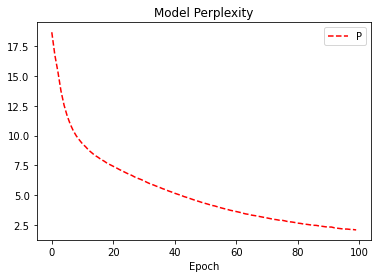

In [68]:
plothist(PRX)

In [52]:
history.history['loss']

[2.9260904788970947,
 2.8175323009490967,
 2.729447841644287,
 2.6184475421905518,
 2.528779983520508,
 2.4553942680358887,
 2.393841505050659,
 2.3414652347564697,
 2.2985823154449463,
 2.2638378143310547,
 2.229809522628784,
 2.2039334774017334,
 2.171537399291992,
 2.146864175796509,
 2.1211111545562744,
 2.1023714542388916,
 2.0796093940734863,
 2.0616981983184814,
 2.0387320518493652,
 2.021791696548462,
 2.0042595863342285,
 1.9865821599960327,
 1.9670374393463135,
 1.9494826793670654,
 1.930734634399414,
 1.9126529693603516,
 1.896547555923462,
 1.875447154045105,
 1.858543872833252,
 1.8434799909591675,
 1.824702262878418,
 1.8037713766098022,
 1.7840981483459473,
 1.7689614295959473,
 1.7507212162017822,
 1.7342219352722168,
 1.7143431901931763,
 1.6979718208312988,
 1.6775233745574951,
 1.6613084077835083,
 1.641532063484192,
 1.624594807624817,
 1.6080710887908936,
 1.5865751504898071,
 1.5703027248382568,
 1.551650881767273,
 1.5324305295944214,
 1.5141092538833618,
 1.4964